<a href="https://colab.research.google.com/github/SwathiMenon/Natural-Language-Processing/blob/main/Disaster_Classification_Using_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim:To Classify if a Tweet refer to disaster or not.  


To classify whether a tweet refers to a disaster or not, sophisticated natural language processing (NLP) techniques are employed. NLP algorithms are designed to analyze the text content of tweets and extract relevant features, such as keywords, context, and sentiment. By using machine learning models, these features are then used to make predictions about whether the tweet is related to a disaster or not.

The classification process involves training the model on a vast dataset of labeled tweets, containing examples of both disaster-related and non-disaster-related tweets. During training, the model learns patterns and associations between specific words and phrases and their association with disasters. Once the model is trained, it can accurately classify new tweets as disaster-related or non-disaster-related based on the knowledge it has acquired.

Dataset:The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword.the text were manually classified whether the tweet refer to a disaster(0)event or not(1).

Dataset link:https://www.kaggle.com/datasets/vstepanenko/disaster-tweets


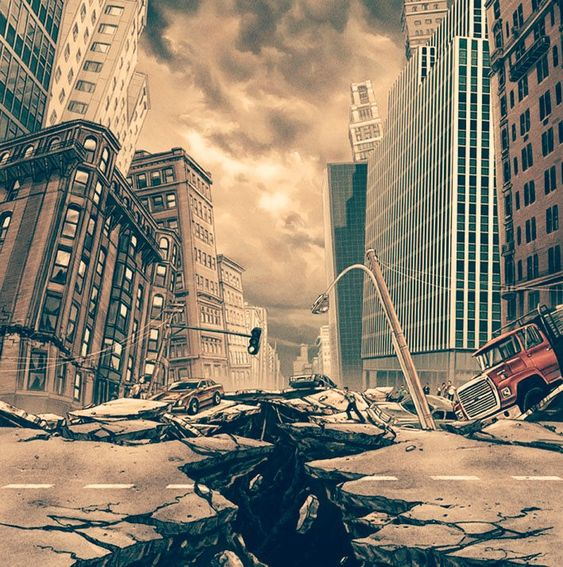



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/tweets.csv")
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


**PREPROCESSING**

In [ ]:
lst=["id","keyword","location" 	]
for i in lst:
  df.drop([i],inplace=True,axis=1)

In [ ]:
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
df.isna().sum()

text      0
target    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df1=df.copy()

**PREPROCESSING**

In [ ]:
df.dtypes

text      object
target     int64
dtype: object

In [ ]:
df["target"].unique()

array([1, 0])

**REMOVING SPECIAL CHARECTERS**

In [ ]:
msg=df.text
msg

0        Communal violence in Bhainsa, Telangana. "Ston...
1        Telangana: Section 144 has been imposed in Bha...
2        Arsonist sets cars ablaze at dealership https:...
3        Arsonist sets cars ablaze at dealership https:...
4        "Lord Jesus, your love brings freedom and pard...
                               ...                        
11365    Media should have warned us well in advance. T...
11366    i feel directly attacked 💀 i consider moonbin ...
11367    i feel directly attacked 💀 i consider moonbin ...
11368    ok who remember "outcast" nd the "dora" au?? T...
11369       Jake Corway wrecked while running 14th at IRP.
Name: text, Length: 11370, dtype: object

In [ ]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

<ipython-input-65-53af49f42db0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+'," ")


0        Communal violence in Bhainsa Telangana Stones ...
1        Telangana Section 144 has been imposed in Bhai...
2        Arsonist sets cars ablaze at dealership https ...
3        Arsonist sets cars ablaze at dealership https ...
4         Lord Jesus your love brings freedom and pardo...
                               ...                        
11365    Media should have warned us well in advance Th...
11366    i feel directly attacked i consider moonbin am...
11367    i feel directly attacked i consider moonbin am...
11368    ok who remember outcast nd the dora au THOSE A...
11369       Jake Corway wrecked while running 14th at IRP 
Name: text, Length: 11370, dtype: object

**CREATING A WORD CLOUD**

In [ ]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['text'].values)

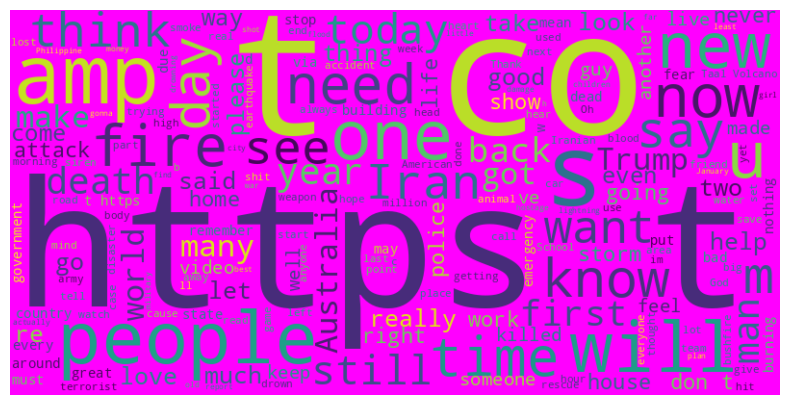

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='magenta').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**STEMMING AND TOKENISING**

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from pandas.core import apply
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [ ]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [ ]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

**VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 1435)	0.2581381723250619
  (0, 16630)	0.21202872182289256
  (0, 19594)	0.23705003202715622
  (0, 17218)	0.1783679226636362
  (0, 1968)	0.17738225386342024
  (0, 8987)	0.39829870284254293
  (0, 12575)	0.23411632149931874
  (0, 14096)	0.3132653390821131
  (0, 20119)	0.3445612855018603
  (0, 17604)	0.25952142385097104
  (0, 18218)	0.2750941641475768
  (0, 2971)	0.279681620529975
  (0, 19739)	0.25078322708374273
  (0, 4538)	0.23341817057781633
  (1, 8223)	0.23735655419538024
  (1, 18974)	0.18784364034355078
  (1, 2935)	0.21553127403949376
  (1, 6563)	0.20561183286726356
  (1, 4323)	0.29879016438961886
  (1, 1640)	0.1571473878541045
  (1, 9965)	0.44394020327991857
  (1, 7523)	0.13275556397077393
  (1, 9403)	0.3080132049973384
  (1, 2831)	0.15689044952206171
  (1, 198)	0.3539886144050519
  :	:
  (11367, 7028)	0.20238817788488983
  (11367, 5031)	0.22838042160962757
  (11367, 1939)	0.15169805824768268
  (11367, 18396)	0.11958035816466946
  (11367, 9040)	0.06470092514700249
  (11367, 1968

In [ ]:
y=df['target'].values
y

array([1, 1, 1, ..., 0, 0, 1])

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

**MODEL CREATION**

In [ ]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv,rf,ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))


SVC()
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2788
           1       0.95      0.41      0.57       623

    accuracy                           0.89      3411
   macro avg       0.92      0.70      0.75      3411
weighted avg       0.90      0.89      0.87      3411

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2788
           1       0.91      0.39      0.54       623

    accuracy                           0.88      3411
   macro avg       0.89      0.69      0.74      3411
weighted avg       0.88      0.88      0.86      3411

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2788
           1       0.67      0.34      0.45       623

    accuracy                           0.85      3411
   macro avg       0.77      0.65      0.68      3411
weighted avg       0.8

In [ ]:
y_new=model.predict(tf.transform(["Will u b going to explore from home? "]))
if y_new==1:
    print("spam")
if y_new==0:
    print("not spam")


not spam


**ARTIFICIAL NEURAL NETWORKS**

In [ ]:
# Replace NaN values with empty strings (if any)
df1['text'].fillna('', inplace=True)

In [ ]:
# Extract text and labels from DataFrame
texts = df1['text'].tolist()
labels = df1['target'].tolist()


In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to make them the same length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# Convert labels to one-hot encoded vectors
labels = np.array(labels)
num_classes = len(np.unique(labels))
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/10
256/256 [==============================] - 16s 60ms/step - loss: 0.3819 - accuracy: 0.8385 - val_loss: 0.3132 - val_accuracy: 0.8758
Epoch 2/10
256/256 [==============================] - 15s 57ms/step - loss: 0.0737 - accuracy: 0.9767 - val_loss: 0.3661 - val_accuracy: 0.8714
Epoch 3/10
256/256 [==============================] - 15s 58ms/step - loss: 0.0054 - accuracy: 0.9989 - val_loss: 0.4115 - val_accuracy: 0.8692
Epoch 4/10
256/256 [==============================] - 15s 57ms/step - loss: 5.5981e-04 - accuracy: 1.0000 - val_loss: 0.4392 - val_accuracy: 0.8703
Epoch 5/10
256/256 [==============================] - 15s 57ms/step - loss: 3.3247e-04 - accuracy: 0.9999 - val_loss: 0.4692 - val_accuracy: 0.8725
Epoch 6/10
256/256 [==============================] - 15s 59ms/step - loss: 5.9455e-04 - accuracy: 0.9999 - val_loss: 0.4577 - val_accuracy: 0.8714
Epoch 7/10
256/256 [==============================] - 15s 58ms/step - loss: 3.6785e-04 - accuracy: 0.9999 - val_loss: 0.4700

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

72/72 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8782
Test Loss: 0.4360, Test Accuracy: 0.8782


WE CAN SEE THE HIGEST ACCURACY OCCURED IN